# INM430 - Tiny DS Project Progress Report


***

** Student Name: ** _Laura Varsandan_

** Project Title:** _A journey into supermarket macrospace_

***




## Part-1: Data source and domain description (maximum 150 words):

The supermarket industry has numerous challenges that could be solved with Data Science. From professional experience, one of these challenges is the "macrospace" problem: how much space each section should occupy in a store in order to maximize sales or profit. This analysis will use open source data on the competition website Kaggle (https://www.kaggle.com/c/favorita-grocery-sales-forecasting). 

The key data inputs are the following:
- daily volume of sales by product and store
- daily number of transactions by store
- prices of oil
- holiday events
- store metadata
- product metadata

We will assume that this supermarket chain aims to maximize the volume of sales by allocating enough products to the high-performing sections in each store. The objective of the analysis is a forecast of how well each class in a section is likely to perform in terms of unit volume, which in turn will dictate how many products to allocate. 

***



## Part-2: Analysis Strategy and Plans (maximum 200 words):

Firstly, the datasets will be combined, whilst addressing the missing values. The data will then be aggregated at a day-store-class level, for which I will forecast the average sales per product. Next, existing features will be transformed and new features will be created. 

The data will then be split into a training and testing dataset. For example, if the month we are trying to predict is July 2017, I will include historical data up to May 2017, to mirror the timing of real-life macrospace decisions.

The analysis should consist of a prediction phase and as a stretch goal, an optimization phase:
- Prediction phase: At least one type of multiple regression algorithm will be chosen to predict the average unit sales/product for a day-store-class combination. Adjusted R-squared will be used to determine the goodness of fit. If several models are built, they will be compared based on the prediction accuracy on the test set using RMSE. 
- Optimisation phase: The predicted values will then be used in an optimization algorithm that will suggest how many products should be ranged in each store-class combination for our target month to maximize volume sales. These will be then aggregated at store-section level.



***
***

## Part-3: Initial investigations on the data sources (maximum 150 words): 

The datasets have the following dimensions:

| Datasets        | Rows          | Columns  |
| --------------- |:-------------:| --------:|
| holidays_events | 350           |     6    |
| items           | 4,100         |     4    |
| oil             | 1,218         |     2    |
| stores          | 54            |     5    |
| train           | 125,497,040   |     6    |
| transactions    | 83,488        |     3    |


***
***
## Part-4: Python code for initial investigations

### Reading in the datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dtypes={'date':np.str,'type':np.str,'locale':np.str,'locale_name':np.str,'description':np.str,'transferred':np.bool}
parse_dates=['date']
holidays_events = pd.read_csv('holidays_events.csv', dtype=dtypes, parse_dates=parse_dates) # opens the csv file
print("Rows and columns:",holidays_events.shape)
pd.DataFrame.head(holidays_events)

Rows and columns: (350, 6)


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [3]:
dtypes={'item_nbr': np.int64,'family':np.str,'class':np.int64,'perishable':np.int64}
items = pd.read_csv('items.csv',dtype=dtypes) # opens the csv file
print("Rows and columns:",items.shape)
pd.DataFrame.head(items)

Rows and columns: (4100, 4)


,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [4]:
dtypes={'date':np.str,'dcoilqtico': np.float64}
parse_dates=['date']
oil = pd.read_csv('oil.csv', dtype=dtypes, parse_dates=parse_dates) # opens the csv file
print("Rows and columns:",oil.shape)
pd.DataFrame.head(oil)

Rows and columns: (1218, 2)


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [5]:
dtypes={'store_nbr':np.int64,'city':np.str,'state':np.str,'type':np.str,'cluster':np.int64}
stores = pd.read_csv('stores.csv',dtype=dtypes) # opens the csv file
print("Rows and columns:",stores.shape)
pd.DataFrame.head(stores)

Rows and columns: (54, 5)


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [6]:
dtypes={'id': np.int64,'date':np.str,'store_nbr':np.int64,'item_nbr':np.int64,'unit_sales': np.float64,'onpromotion':np.float64}
parse_dates=['date']
train = pd.read_csv('train.csv', dtype=dtypes,parse_dates=parse_dates) # opens the csv file
print("Rows and columns:",train.shape)
pd.DataFrame.head(train)

Rows and columns: (125497040, 6)


,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN


In [7]:
dtypes={'date':np.str,'store_nbr':np.int64,'transactions':np.int64}
parse_dates=['date']
transactions = pd.read_csv('transactions.csv', dtype=dtypes,parse_dates=parse_dates) # opens the csv file
print("Rows and columns:",transactions.shape)
pd.DataFrame.head(transactions)

Rows and columns: (83488, 3)


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


### Merge the train dataset with items

Since the 'train' dataset has 125m rows, this will cause computational complexity problems down the line. For the purposes of this analysis, product level data is not necessary, so in order to reduce the number of rows, I will aggregate the data one level up: at class level.

For the colums that are flags (perishable and onpromotion), I will convert those to display the number of products where the flags were 'True'.

In [8]:
merged=pd.merge(train,items,on='item_nbr', how='left')
print("Rows and columns:",merged.shape)
pd.DataFrame.head(merged)

Rows and columns: (125497040, 9)


,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable
0,0,2013-01-01,25,103665,7.0,NaN,BREAD/BAKERY,2712,1
1,1,2013-01-01,25,105574,1.0,NaN,GROCERY I,1045,0
2,2,2013-01-01,25,105575,2.0,NaN,GROCERY I,1045,0
3,3,2013-01-01,25,108079,1.0,NaN,GROCERY I,1030,0
4,4,2013-01-01,25,108701,1.0,NaN,DELI,2644,1


In [9]:
# Inspect the columns with NaN before Aggregating
merged.isnull().sum()

id                    0
date                  0
store_nbr             0
item_nbr              0
unit_sales            0
onpromotion    21626880
family                0
class                 0
perishable            0
dtype: int64

It is therefore safe to aggregate all data points to a class level apart from the 'on promotion' column which has a high number of missing values.

In [10]:
group=merged.groupby(['date','store_nbr','class','family'],as_index=False)
class_sales=pd.DataFrame(group['unit_sales'].agg('sum'))
pd.DataFrame.head(class_sales)

,date,store_nbr,class,family,unit_sales
0,2013-01-01,25,1002,GROCERY I,7.0
1,2013-01-01,25,1003,GROCERY I,1.0
2,2013-01-01,25,1004,GROCERY I,32.0
3,2013-01-01,25,1006,GROCERY I,3.0
4,2013-01-01,25,1008,GROCERY I,4.0


In [11]:
class_items=pd.DataFrame(group['item_nbr'].agg('count'))
pd.DataFrame.head(class_items)

,date,store_nbr,class,family,item_nbr
0,2013-01-01,25,1002,GROCERY I,5
1,2013-01-01,25,1003,GROCERY I,1
2,2013-01-01,25,1004,GROCERY I,14
3,2013-01-01,25,1006,GROCERY I,3
4,2013-01-01,25,1008,GROCERY I,1


In [12]:
class_perishables=pd.DataFrame(group['perishable'].agg('sum'))
pd.DataFrame.head(class_perishables)

,date,store_nbr,class,family,perishable
0,2013-01-01,25,1002,GROCERY I,0
1,2013-01-01,25,1003,GROCERY I,0
2,2013-01-01,25,1004,GROCERY I,0
3,2013-01-01,25,1006,GROCERY I,0
4,2013-01-01,25,1008,GROCERY I,0


Merging the unit sales, number of items and perishable metrics in one file

In [13]:
class_merged=pd.merge(class_sales,class_items,on=['date','store_nbr','class','family'],how='left')
class_merged=pd.merge(class_merged,class_perishables,on=['date','store_nbr','class','family'],how='left')
class_merged.columns=['date','store_nbr','class','family','sum_unit_sales','no_items','no_perishable_items']
print("Rows and columns:",class_merged.shape)
pd.DataFrame.head(class_merged)

Rows and columns: (15852838, 7)


,date,store_nbr,class,family,sum_unit_sales,no_items,no_perishable_items
0,2013-01-01,25,1002,GROCERY I,7.0,5,0
1,2013-01-01,25,1003,GROCERY I,1.0,1,0
2,2013-01-01,25,1004,GROCERY I,32.0,14,0
3,2013-01-01,25,1006,GROCERY I,3.0,3,0
4,2013-01-01,25,1008,GROCERY I,4.0,1,0


### Dealing with missing Values for 'onpromotion' field

In [16]:
# Let's look at the types of values for 'onpromotion'
merged['onpromotion'].value_counts(normalize=True,dropna=False)

 0.0    0.765188
NaN     0.172330
 1.0    0.062483
Name: onpromotion, dtype: float64

We can see that 17% of the values as missing, 76% of values are 0 and only 6% of values are 1. 

The next question we need to ask ourselves is if these values are missing randomly across the dataset, or ar they always missing for example for a certain store or product. Let's find out.

In [14]:
# Looking to see what % of stores have missing values for 'onpromotion'
nulls=pd.DataFrame(merged[pd.isnull(merged.onpromotion)])
stores_with_nulls=len(nulls['store_nbr'].unique())
all_stores=len(stores['store_nbr'].unique())
stores_with_nulls/all_stores

0.8703703703703703

The missing values seem to be relatively well spread across the majority of stores. That means we can't say that a few stores are causing the missing values.

Let's also look at products. 

In [15]:
products_with_nulls=len(nulls['item_nbr'].unique())
all_products=len(items['item_nbr'].unique())
products_with_nulls/all_products

0.6509756097560976

The missing values also seem to be relatively well spread across the majority of products.That means we can't say that a few stores are causing the missing values.

Let's also look at the time period.

In [17]:
dates_with_nulls=len(nulls['date'].unique())
all_dates=len(merged['date'].unique())
dates_with_nulls/all_dates

0.2695961995249406

Only 27% of dates have null values for 'onpromotion'. We need to therefore investigate 1) which dates are the most problematic and 2) for each date, how many products have missing information

In [18]:
#counting the frequency of nulls for each date
date_null_agg=pd.DataFrame(nulls['date'].value_counts())
date_null_agg.columns=['frequency']
date_null_agg['date']=date_null_agg.index
pd.DataFrame.head(date_null_agg)

,frequency,date
2014-03-01,70051,2014-03-01
2014-01-04,69052,2014-01-04
2014-03-29,68879,2014-03-29
2014-01-18,68864,2014-01-18
2014-01-11,68393,2014-01-11


In [19]:
#counting the frequency of train data for each date
date_agg=pd.DataFrame(merged['date'].value_counts())
date_agg.columns=['frequency']
date_agg['date']=date_agg.index
pd.DataFrame.head(date_agg)

,frequency,date
2017-07-01,118194,2017-07-01
2017-04-01,118122,2017-04-01
2017-07-02,117286,2017-07-02
2017-05-01,117116,2017-05-01
2017-06-04,117074,2017-06-04


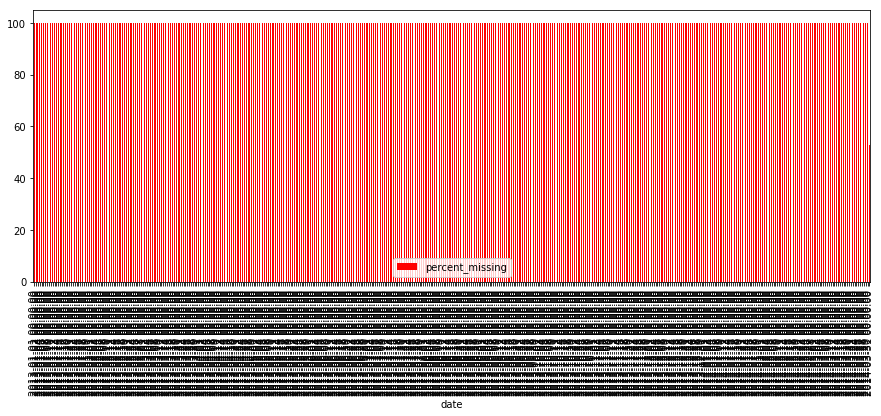

In [27]:
#calculating the share of missing values for each date
date_null_agg_merged=pd.merge(date_null_agg,date_agg, on='date',how='left')
date_null_agg_merged['percent_missing']=date_null_agg_merged['frequency_x']/date_null_agg_merged['frequency_y']*100
date_null_agg_merged=date_null_agg_merged.sort_values(by='date')
pd.DataFrame.head(date_null_agg_merged)
date_null_agg_merged.plot('date','percent_missing',kind='bar', color='r', figsize=(15,5))

It looks like on certain days all the values for 'on-promotion' are missing. We need to understand exactly which time periods are affected by this so that we can make a decision on how to treat missing variables. 

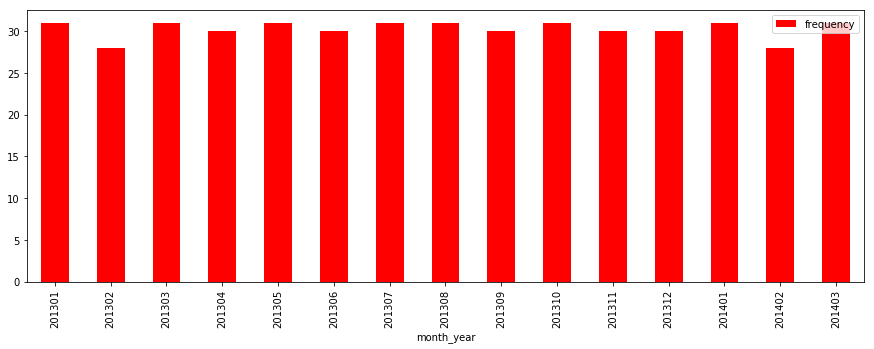

In [30]:
date_null_agg_merged['month_year']=100*date_null_agg_merged['date'].dt.year+date_null_agg_merged['date'].dt.month
month_null_agg_merged=pd.DataFrame(date_null_agg_merged['month_year'].value_counts())
month_null_agg_merged.columns=['frequency']
month_null_agg_merged['month_year']=month_null_agg_merged.index
month_null_agg_merged=month_null_agg_merged.sort_values(by='month_year')
pd.DataFrame.head(month_null_agg_merged)
month_null_agg_merged.plot('month_year','frequency',kind='bar', color='r', figsize=(15,5))

We can see that the 'onpromotion' missing values was incurred for all dates until March 2014. This is probably due to the fact that the company did not capture this kind of data before hand. 

From domain knowledge, the 'onpromotion' field is likely to be very important in predicting sales. Therefore, we can either decide to try an impute the missing values for that period, or exclude that period from analysis. 

In order to decide, let's take a look at how many products were ranged in that period compared to the latest months of the analysis. This will give us an indication of how relevant the old data is for predicting more recent data. 

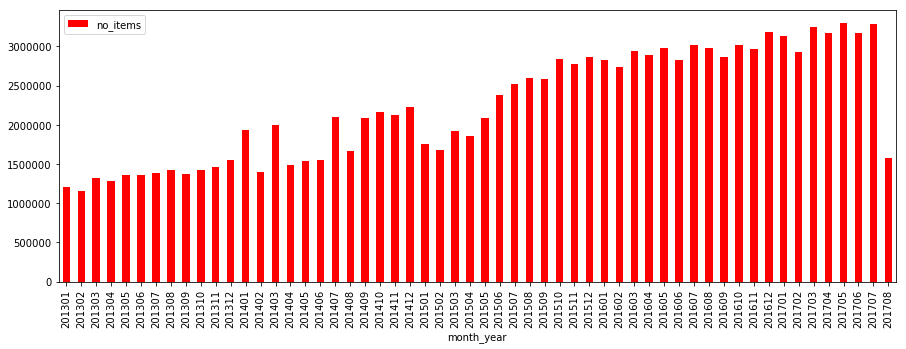

In [35]:
class_merged['month_year']=100*class_merged['date'].dt.year+class_merged['date'].dt.month
monthyear_group=class_merged.groupby(['month_year'],as_index=False)
month_year_products=pd.DataFrame(monthyear_group['no_items'].agg('sum'))
month_year_products=month_year_products.sort_values(by='month_year')
month_year_products.plot('month_year','no_items',kind='bar', color='r', figsize=(15,5))

We can see from this graph that the product choice in the past 2-3 years has almost doubled compared to 2013, which means that the period with missing values for 'onpromotion' could be excluded as it might not be as relevant. Moreover, if we did try to inpute the data, the 'onpromotion' flag has unbalanced values (only 6% of data points are on promotion) which would make the predictions very difficult and inacurate predictions for the 'onpromotion' field might make our model less accurate. Therefore we will exclude the period between January 2013 and March 2014 from our analysis. 

In [36]:
merged = merged[merged.date>'2014-03-31']

In [39]:
min_date=min(merged['date'])
max_date=max(merged['date'])
print ("Min Date:",min_date)
print ("Max Date:",max_date)

Min Date: 2014-04-01 00:00:00
Max Date: 2017-08-15 00:00:00


In [40]:
class_merged=class_merged[class_merged.date>'2014-03-31']

Adding the onpromotion count to the class_merged dataset

In [43]:
group=merged.groupby(['date','store_nbr','class','family'],as_index=False)
class_onpromotion=pd.DataFrame(group['onpromotion'].agg('sum'))
pd.DataFrame.head(class_onpromotion)

MemoryError: 

It looks like we have anough data for the number of trasactions as well. We will take a look at the store_day view later on to see if there are any missing values.

Let's check the price of oil

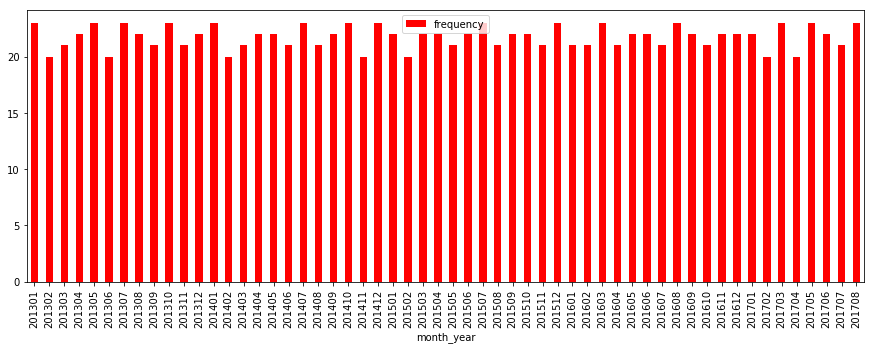

In [65]:
oil['month_year']=100*oil['date'].dt.year+oil['date'].dt.month
monthyear_agg=pd.DataFrame(oil['month_year'].value_counts())
monthyear_agg.columns=['frequency']
monthyear_agg['month_year']=monthyear_agg.index
monthyear_agg=monthyear_agg.sort_values(by='month_year')
monthyear_agg.plot('month_year','frequency',kind='bar', color='r', figsize=(15,5))

Although we have oil price data covering the entire period that we are interested in, from January 2013 to July 2017, it doesn't look like we have data for all days in a month. Let's take a closer look at, for example 201411, which seems to have fewer data points. 

In [72]:
oil[oil.month_year==201411].sort_values(by='date')

,date,dcoilwtico,month_year
479,2014-11-03,78.77,201411
480,2014-11-04,77.15,201411
481,2014-11-05,78.71,201411
482,2014-11-06,77.87,201411
483,2014-11-07,78.71,201411
484,2014-11-10,77.43,201411
485,2014-11-11,77.85,201411
486,2014-11-12,77.16,201411
487,2014-11-13,74.13,201411
488,2014-11-14,75.91,201411


We can notice some gaps in the data in a sense that not all days have the price of oil. We have 2 options: either find a solution to deal with the missing values from this dataset or find another dataset that has values for all the days in the range of January 2013 and July 2017. 

Given the fact that the oil price data provided by Kaggle is probably taken from the daily oil price of the West Texas Intermediate (WTI) - Cushing, Oklahoma(https://fred.stlouisfed.org/series/DCOILWTICO), which is deemed to represent the oil price, it's difficult to find a better quality of oil price data. Alternative sources of the same data have the same gaps (https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=PET&s=RWTC&f=D). 

Therefore, this dataset will be used and we will have to impute the missing values. 

### Merging the training dataset with the oil price dataset

In [17]:
merged=pd.merge(merged,oil,on='date', how='left')
print("Rows and columns:",merged.shape)

MemoryError: 

In [18]:
pd.DataFrame.to_csv(merged)

MemoryError: 

### Merging the transactions dataset with the main dataset

In [16]:
merged=pd.merge(merged,transactions,on=['date','store_nbr'], how='left')
print("Rows and columns:",merged.shape)

MemoryError: 

In [ ]:
to